In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models

In [16]:
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.edgecolor'] = 'black'
plt.rc('legend',fontsize=15)

plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['xtick.top'] = True

plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['ytick.right'] = True

plt.rcParams['font.family'] = 'Times New Roman'

### calling in 10k merger tree realizations

In [4]:
s0 = np.load("../../../data/MW-analog/meta_data_psi3/models.npz")["mass"]

s15 = np.load("../../../data/cross_host/lognorm_015_psi3/models.npz")["mass"]

s30 = np.load("../../../data/cross_host/lognorm_030_psi3/models.npz")["mass"]

In [5]:
def push_SAGA(lgMh_mat, theta, min_mass):

    lgMs_mat = np.apply_along_axis(jsm_SHMR.general, 0, theta, lgMh_mat, 0, 1)

    N_std = []
    Ms1_std = []
    for i in range(lgMs_mat.shape[0]):
        stat_i = jsm_stats.SatStats_D(lgMs_mat[i], min_mass=min_mass)
        N_std.append(np.std(stat_i.Nsat_perhost))
        Ms1_std.append(np.std(stat_i.maxmass))

    return np.array(N_std), np.array(Ms1_std)

In [6]:
fid_theta = [10.5, 2.0, 0.0, 0, 0, 0] # no scatter in the SHMR!
min_mass = 6.5

In [7]:
N_std_saga_s0, Ms1_std_saga_s0 = push_SAGA(s0, fid_theta, min_mass)

In [8]:
N_std_saga_s15, Ms1_std_saga_s15 = push_SAGA(s15, fid_theta, min_mass)

In [9]:
N_std_saga_s30, Ms1_std_saga_s30 = push_SAGA(s30, fid_theta, min_mass)

In [10]:
def push_single_realization(lgMh_mat, theta, min_mass):

    N_std = []
    Ms1_std = []

    single_trees = lgMh_mat[:, 0]
    for i in range(lgMh_mat.shape[0]):
        lgMh_i = np.tile(single_trees[i], (100, 1))
        lgMs_i = jsm_SHMR.general(theta, lgMh_i, 0, 1)
        stat_i = jsm_stats.SatStats_D(lgMs_i, min_mass=min_mass)

        N_std.append(np.std(stat_i.Nsat_perhost))
        Ms1_std.append(np.std(stat_i.maxmass))

    return np.mean(N_std), np.std(N_std), np.mean(Ms1_std), np.std(Ms1_std)

### the paper

In [11]:
N_means_s0 = []
N_errs_s0 = []

N_means_s0_Ms = []
N_errs_s0_Ms = []

N_means_s15 = []
N_errs_s15 = []

N_means_s15_Ms = []
N_errs_s15_Ms = []

N_means_s30 = []
N_errs_s30 = []

N_means_s30_Ms = []
N_errs_s30_Ms = []

sigmas = np.linspace(0.1, 2.5, 24)

for sigma in sigmas:
    mean_i_s0, err_i_s0, mean_i_s0_Ms, err_i_s0_Ms = push_single_realization(s0, [10.5, 2.0, sigma, 0, 0, 0], min_mass)
    N_means_s0_Ms.append(mean_i_s0_Ms)
    N_errs_s0_Ms.append(err_i_s0_Ms)
    N_means_s0.append(mean_i_s0)
    N_errs_s0.append(err_i_s0)

    mean_i_s15, err_i_s15, mean_i_s15_Ms, err_i_s15_Ms = push_single_realization(s15, [10.5, 2.0, sigma, 0, 0, 0], min_mass)
    N_means_s15_Ms.append(mean_i_s15_Ms)
    N_errs_s15_Ms.append(err_i_s15_Ms)
    N_means_s15.append(mean_i_s15)
    N_errs_s15.append(err_i_s15)

    mean_i_s30, err_i_s30, mean_i_s30_Ms, err_i_s30_Ms = push_single_realization(s30, [10.5, 2.0, sigma, 0, 0, 0], min_mass)
    N_means_s30_Ms.append(mean_i_s30_Ms)
    N_errs_s30_Ms.append(err_i_s30_Ms)
    N_means_s30.append(mean_i_s30)
    N_errs_s30.append(err_i_s30)

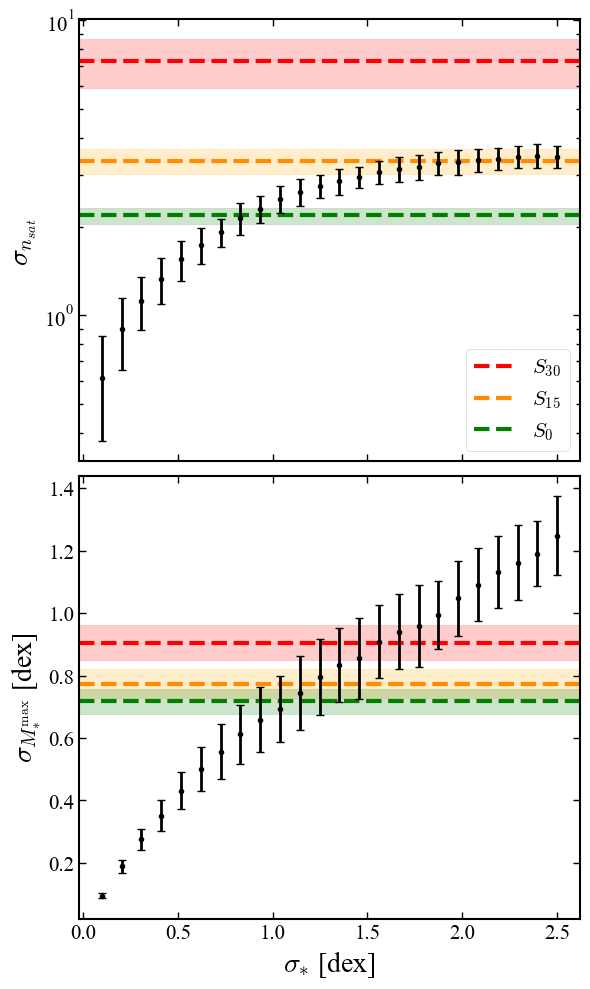

In [23]:
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(6,10))

axs[0].axhline(N_std_saga_s30.mean(), color="red", lw=3, label="$S_{30}$", ls="--")
axs[0].axhspan(N_std_saga_s30.mean() - N_std_saga_s30.std(), N_std_saga_s30.mean() + N_std_saga_s30.std(),  color="red", alpha=0.2, zorder=0)

axs[0].axhline(N_std_saga_s15.mean(), color="darkorange", lw=3, label="$S_{15}$", ls="--")
axs[0].axhspan(N_std_saga_s15.mean() - N_std_saga_s15.std(), N_std_saga_s15.mean() + N_std_saga_s15.std(),  color="orange", alpha=0.2, zorder=0)

axs[0].axhline(N_std_saga_s0.mean(), color="green", lw=3, label="$S_{0}$", ls="--")
axs[0].axhspan(N_std_saga_s0.mean() - N_std_saga_s0.std(), N_std_saga_s0.mean() + N_std_saga_s0.std(),  color="green", alpha=0.2, zorder=0)

axs[0].errorbar(sigmas, N_means_s0, yerr=N_errs_s0, fmt=".", capsize=3, color="black")
axs[0].legend()

axs[0].set_ylabel("$\\sigma_{n_{sat}}$ ", fontsize=20)
axs[0].set_yscale("log")

axs[1].axhline(Ms1_std_saga_s30.mean() , color="red", lw=3, label="$S_{30}$", ls="--")
axs[1].axhspan(Ms1_std_saga_s30.mean() - Ms1_std_saga_s30.std(), Ms1_std_saga_s30.mean() + Ms1_std_saga_s30.std(),  color="red", alpha=0.2, zorder=0)

axs[1].axhline(Ms1_std_saga_s15.mean(), color="darkorange", lw=3, label="$S_{15}$", ls="--")
axs[1].axhspan(Ms1_std_saga_s15.mean() - Ms1_std_saga_s15.std(), Ms1_std_saga_s15.mean() + Ms1_std_saga_s15.std(),  color="orange", alpha=0.2, zorder=0)

axs[1].axhline(Ms1_std_saga_s0.mean(), color="green", lw=3, label="$S_{0}$", ls="--")
axs[1].axhspan(Ms1_std_saga_s0.mean() - Ms1_std_saga_s0.std(), Ms1_std_saga_s0.mean() + Ms1_std_saga_s0.std(),  color="green", alpha=0.2, zorder=0)


axs[1].set_xlabel('$\\sigma_{*}$ [dex]', fontsize=20)
axs[1].set_ylabel("$\\sigma_{M_{*}^{\mathrm{max}}}$ [dex]", fontsize=20)

axs[1].errorbar(sigmas, N_means_s0_Ms, yerr=N_errs_s0_Ms, fmt=".", capsize=3, color="black")

plt.tight_layout()
plt.savefig("../../../paper_1/figures/updated/scatter_vs_variance.pdf", bbox_inches="tight")
plt.show()

In [13]:
# N_means_s0 = []
# N_errs_s0 = []

# N_means_s15 = []
# N_errs_s15 = []

# N_means_s30 = []
# N_errs_s30 = []

# sigmas = np.linspace(0.1, 2.5, 24)

# for sigma in sigmas:
#     mean_i_s0, err_i_s0, _, _ = push_single_realization(s0, [10.5, 2.0, sigma, 0, 0, 0], min_mass)
#     N_means_s0.append(mean_i_s0)
#     N_errs_s0.append(err_i_s0)

#     mean_i_s15, err_i_s15, _, _ = push_single_realization(s15, [10.5, 2.0, sigma, 0, 0, 0], min_mass)
#     N_means_s15.append(mean_i_s15)
#     N_errs_s15.append(err_i_s15)

#     mean_i_s30, err_i_s30, _, _ = push_single_realization(s30, [10.5, 2.0, sigma, 0, 0, 0], min_mass)
#     N_means_s30.append(mean_i_s30)
#     N_errs_s30.append(err_i_s30)
# plt.figure(figsize=(8,8))

# for i in range(100):
#     plt.axhline(N_std_saga_s30[i], color="red", alpha=0.04)
#     plt.axhline(N_std_saga_s15[i], color="darkorange", alpha=0.04)
#     plt.axhline(N_std_saga_s0[i], color="green", alpha=0.04)

# plt.axhline(np.mean(N_std_saga_s30), color="red", lw=3, label="$\\sigma_{M_{*}}=0,  s_{30}$")
# plt.axhline(np.mean(N_std_saga_s15), color="darkorange", lw=3, label="$\\sigma_{M_{*}}=0,  s_{15}$")
# plt.axhline(np.mean(N_std_saga_s0), color="green", lw=3, label="$\\sigma_{M_{*}}=0,  s_{0}$")

# #plt.errorbar(sigmas, N_means_s30, yerr=N_errs_s30, fmt=".", capsize=3, color="red")
# #plt.errorbar(sigmas, N_means_s15, yerr=N_errs_s15, fmt=".", capsize=3, color="orange", label="single realization")
# plt.errorbar(sigmas, N_means_s0, yerr=N_errs_s0, fmt=".", capsize=3, color="black")

# plt.legend(fontsize=15)

# plt.xlabel('$\\sigma_{M_{*}}$', fontsize=20)
# plt.ylabel("$\\sigma_{N_{sat}}$ ", fontsize=20)
# plt.yscale("log")
# plt.show()

In [14]:
# N_means_s0 = []
# N_errs_s0 = []

# N_means_s15 = []
# N_errs_s15 = []

# N_means_s30 = []
# N_errs_s30 = []

# sigmas = np.linspace(0.1, 2.5, 24)

# for sigma in sigmas:
#     _, _, mean_i_s0, err_i_s0 = push_single_realization(s0, [10.5, 2.0, sigma, 0, 0, 0], min_mass)
#     N_means_s0.append(mean_i_s0)
#     N_errs_s0.append(err_i_s0)

#     _, _, mean_i_s15, err_i_s15 = push_single_realization(s15, [10.5, 2.0, sigma, 0, 0, 0], min_mass)
#     N_means_s15.append(mean_i_s15)
#     N_errs_s15.append(err_i_s15)

#     _, _, mean_i_s30, err_i_s30 = push_single_realization(s30, [10.5, 2.0, sigma, 0, 0, 0], min_mass)
#     N_means_s30.append(mean_i_s30)
#     N_errs_s30.append(err_i_s30)
# plt.figure(figsize=(8,6))

# for i in range(100):
#     plt.axhline(Ms1_std_saga_s30[i], color="red", alpha=0.04)
#     plt.axhline(Ms1_std_saga_s15[i], color="darkorange", alpha=0.04)
#     plt.axhline(Ms1_std_saga_s0[i], color="green", alpha=0.04)

# plt.axhline(np.mean(Ms1_std_saga_s30), color="red", lw=3, label="$\\sigma_{M_{*}}=0,  s_{30}$")
# plt.axhline(np.mean(Ms1_std_saga_s15), color="darkorange", lw=3, label="$\\sigma_{M_{*}}=0,  s_{15}$")
# plt.axhline(np.mean(Ms1_std_saga_s0), color="green", lw=3, label="$\\sigma_{M_{*}}=0,  s_{0}$")

# #plt.errorbar(sigmas, N_means_s30, yerr=N_errs_s30, fmt=".", capsize=3, color="red")
# plt.errorbar(sigmas, N_means_s15, yerr=N_errs_s15, fmt=".", capsize=3, color="black", label="single realization")
# #lt.errorbar(sigmas, N_means_s0, yerr=N_errs_s0, fmt=".", capsize=3, color="green")

# plt.legend(fontsize=15)

# plt.xlabel('$\\sigma_{M_{*}}$', fontsize=20)
# plt.ylabel("$\\sigma_{M_{*, 1}}}$ ", fontsize=20)
# plt.show()